# Website Phishing Neural Network

## Library imports

In [1090]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Import Data

### Attributes

### Create designMatrix

In [1091]:
designMatrix = pd.DataFrame(columns = [
    'SFH',
    'PopUpWindow',
    'SSL_Final_State',
    'Request_URL',
    'URL_of_Anchor',
    'Web_Traffic',
    'URL_Length',
    'Age_Of_Domain',
    'IP_Address',
    'Class',
] ) 

### Import data and populate designMatrix

In [1092]:
lineNum = 0

for line in open("Files/data.txt", "r"):
    lineSplit = np.array(line.strip().split(","), dtype=float)
    designMatrix.loc[lineNum] = lineSplit
    lineNum+=1

designMatrix

,SFH,PopUpWindow,SSL_Final_State,Request_URL,URL_of_Anchor,Web_Traffic,URL_Length,Age_Of_Domain,IP_Address,Class
0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,0.0,0.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,1.0,1.0
2,1.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,1.0,0.0,1.0
3,1.0,0.0,1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0
4,-1.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1348,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,1.0
1349,-1.0,0.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,-1.0
1350,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,1.0
1351,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0,1.0


### Normalizing data (not used)

In [1093]:
# holder = designMatrix
# change = np.copy(holder)
# print(change.shape[0])
# print(change.shape[1])
# #print(Con1) 
# #print(Con1[87])

# #Change all 0's and -1's to 0's, and all 1's remain unchanged
# for r in range(change.shape[0]):
#     for c in range(change.shape[1]):
#         if change[r][c] == -1:
#             change[r][c] = 0.0
#         elif change[r][c] == 0:
#             change[r][c] = 0.5
#         elif change[r][c] == 1:
#             change[r][c] = 1.0

# designMatrix = np.copy(change)


# designMatrix = pd.DataFrame(designMatrix, columns = [
#     'SFH',
#     'PopUpWindow',
#     'SSL_Final_State',
#     'Request_URL',
#     'URL_of_Anchor',
#     'Web_Traffic',
#     'URL_Length',
#     'Age_Of_Domain',
#     'IP_Address',
#     'Class',
# ] )

# designMatrix

### Split into training, validation and testing data

In [1094]:
trainData, testData = train_test_split(designMatrix, test_size = 0.4)

# testData, valData = train_test_split(testData, test_size = 0.5)

In [1095]:
print("trainData size: " + str(len(trainData)))
print("valData size: " + str(len(valData)))
print("testData size: " + str(len(testData)))

trainData size: 811
valData size: 271
testData size: 542


In [1096]:
trainX = trainData[[ 'SFH',
    'PopUpWindow',
    'SSL_Final_State',
    'Request_URL',
    'URL_of_Anchor',
    'Web_Traffic',
    'URL_Length',
    'Age_Of_Domain',
    'IP_Address']]
trainX

,SFH,PopUpWindow,SSL_Final_State,Request_URL,URL_of_Anchor,Web_Traffic,URL_Length,Age_Of_Domain,IP_Address
246,0.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,1.0,0.0
888,1.0,0.0,1.0,1.0,1.0,-1.0,0.0,1.0,0.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,1.0
351,1.0,-1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1253,1.0,0.0,1.0,1.0,1.0,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...
482,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1013,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
631,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,0.0
365,0.0,0.0,-1.0,0.0,1.0,1.0,0.0,-1.0,0.0


In [1097]:
trainY = trainData[['Class']]
trainY

,Class
246,1.0
888,-1.0
1,1.0
351,-1.0
1253,-1.0
...,...
482,-1.0
1013,1.0
631,1.0
365,1.0


In [1098]:
testX = testData[[ 'SFH',
    'PopUpWindow',
    'SSL_Final_State',
    'Request_URL',
    'URL_of_Anchor',
    'Web_Traffic',
    'URL_Length',
    'Age_Of_Domain',
    'IP_Address']]
testX

,SFH,PopUpWindow,SSL_Final_State,Request_URL,URL_of_Anchor,Web_Traffic,URL_Length,Age_Of_Domain,IP_Address
403,1.0,-1.0,0.0,-1.0,-1.0,0.0,1.0,1.0,1.0
643,1.0,0.0,1.0,1.0,1.0,-1.0,-1.0,1.0,0.0
1015,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0
1050,-1.0,-1.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,0.0
11,1.0,0.0,1.0,1.0,1.0,-1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
455,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1334,1.0,0.0,-1.0,0.0,-1.0,1.0,0.0,-1.0,0.0
1124,1.0,0.0,1.0,-1.0,1.0,0.0,1.0,1.0,0.0
932,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [1099]:
testY = testData[['Class']]
testY

,Class
403,1.0
643,-1.0
1015,1.0
1050,1.0
11,-1.0
...,...
455,-1.0
1334,-1.0
1124,-1.0
932,-1.0


## Neural Network

In [1100]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 9
        self.hiddenLayerSize = 6
        self.outputLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidDerivative(self, X):
        return X + (1-X)
    
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1).astype(float)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2).astype(float)
        self.a3 = self.sigmoid(self.z3)
        output = self.a3
        return output
    
    def backward(self, X, Y, output):
#         Output layer
        self.output_error = Y - output
        self.output_adjustments = self.output_error * self.sigmoidDerivative(output)
        self.W2 += self.a2.T.dot(self.output_adjustments)
        
#         Hidden layer
        self.hidden_error = self.output_adjustments.dot(self.W2.T)
        self.hidden_adjustments = self.hidden_error * self.sigmoidDerivative(self.a2)
        self.W1 += X.T.dot(self.hidden_adjustments)
        
    def train(self, X, Y):
        output = self.forward(X)
        self.backward(X, Y, output)
#         print(output)
#         print(Y)


    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
#         self.yHat = self.forward(X)
#         J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (lamb/2)*(sum(self.W1**2)+sum(self.W2**2))
        
#         J = 1/X.shape[0] *sum(sum(y*math.log(self.yHat) + (1-y)*log(self.yHat))) + (lamb/(2*X.shape[0]))*(sum(self.W1**2)+sum(self.W2**2))
#         return J
    
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J

### Training

In [1101]:
NN = Neural_Network()

In [1102]:
print("Shape of weights from input to hidden layer: " + str(NN.W1.shape))
print("Shape of weights from hidden to output layer: " + str(NN.W2.shape))

Shape of weights from input to hidden layer: (9, 6)
Shape of weights from hidden to output layer: (6, 3)


In [1103]:
yValues = np.array(trainY)

yActual = np.zeros([yValues.shape[0], 3])

for i in range(0, trainY.shape[0]):
    if yValues[i] == -1:
        yActual[i][0] = 1
    elif yValues[i] == 0.5:
        yActual[i][1] = 1
    elif yValues[i] == 1:
        yActual[i][2] = 1
        
print(trainY.shape[0])
print(yActual.shape)

error = []
timeline = []
totalError = 0

error2 = []
totalError2 = 0


for i in range(0, 1000):
#     print(i)
    
    NN.train(trainX, yActual)
    
    if i%40 == 0: 
        for j in range(0,trainY.shape[0]):
#             recordError = np.abs(NN.output_error[j][0]) + np.abs(NN.output_error[j][1]) + np.abs(NN.output_error[j][2])
#             recordError = recordError/3            
            recordError = np.sqrt(np.square(NN.output_error[j][0]) + np.square(NN.output_error[j][1]) + np.square(NN.output_error[j][2]))
            totalError += recordError
            
        averageerror = totalError/trainY.shape[0]
        error.append(averageerror)
        totalError = 0
        
        for j in range(0,trainY.shape[0]):
            recordError2 = NN.costFunction(np.array(trainX)[j], np.array(trainY)[j])
            totalError2 += recordError2
            
        averageerror2 = totalError2/trainY.shape[0]
        error2.append(averageerror2)
        totalError2 = 0
        
        timeline.append(i) 

811
(811, 3)


C:\Users\dinoa\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


### Plotting training errors

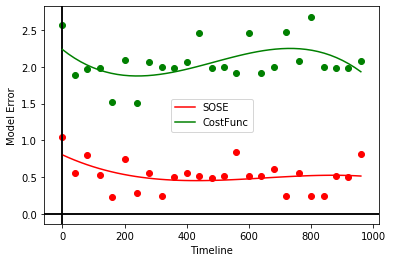

In [1104]:
#Sum of squares error
plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0
plt.scatter(timeline, error, color="red")

# Line of best fit
coefficients1 = np.polyfit(timeline, error, 3)
poly = np.poly1d(coefficients1)
new_timeline = np.linspace(timeline[0], timeline[-1])
new_error = poly(new_timeline)
plt.plot(new_timeline, new_error, color="red", label = "SOSE")

# Cost function
plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0
plt.scatter(timeline, error2, color="green")

# Line of best fit
coefficients2 = np.polyfit(timeline, error2, 3)
poly = np.poly1d(coefficients2)
new_error2 = poly(new_timeline)
plt.plot(new_timeline, new_error2, color="green",label="CostFunc")

plt.legend(loc="center")
plt.xlabel('Timeline')
plt.ylabel('Model Error')

plt.savefig('TrainingErrors.png')

## Decide on phishy, suspicous or legit based on highest activation of output layer

In [1107]:
yOutput = NN.forward(testX)

yPredicted = np.zeros(yOutput.shape[0])

for i in range(0, yOutput.shape[0]):
    maxIndex = yOutput[i].argmax()
    if maxIndex == 0:
        yPredicted[i] = -1
    elif maxIndex == 1:
        yPredicted[i] = 0
    elif maxIndex == 2:
        yPredicted[i] = 1

C:\Users\dinoa\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


# Model Accuracy and Confusion Matrix

In [1108]:
confusionMatrix = np.zeros((3,3))

yValues = np.array(testY)

truePositives = 0

for i in range(0, yPredicted.shape[0]):
    
    if(yPredicted[i] == -1):
        if(yValues[i] == -1):
            truePositives+=1
            confusionMatrix[0,0] += 1
        elif(yValues[i] == 0):
            confusionMatrix[0,1] += 1
        elif(yValues[i] == 1):
            confusionMatrix[0,2] += 1
    elif(yPredicted[i] == 0):
        if(yValues[i] == -1):
            confusionMatrix[1,0] += 1
        elif(yValues[i] == 0):
            truePositives+=1
            confusionMatrix[1,1] += 1
        elif(yValues[i] == 1):
            confusionMatrix[1,2] += 1
    elif(yPredicted[i] == 1):
        if(yValues[i] == -1):
            confusionMatrix[2,0] += 1
        elif(yValues[i] == 0):
            confusionMatrix[2,1] += 1
        elif(yValues[i] == 1):
            truePositives+=1
            confusionMatrix[2,2] += 1

accuracy = truePositives/yValues.shape[0] * 100

X = pd.DataFrame(confusionMatrix, columns = ["Phishy" , "Suspicious", "Legit"], index = ["Phishy", "Suspicious", "Legit"], dtype=int)

print(X)
print(" ")

print("Model Accuracy: " + str(accuracy))

            Phishy  Suspicious  Legit
Phishy         263          33     74
Suspicious       0           0      0
Legit           13          16    143
 
Model Accuracy: 74.90774907749078
